In [2]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
movies = df[df['type'] == 'Movie'].copy()
shows = df[df['type'] == 'TV Show'].copy()

movies['duration'] = movies['duration'].str.replace(' min','', regex=False)
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

shows['duration'] = shows['duration'].str.replace(' Season','', regex=False)
shows['duration'] = shows['duration'].str.replace('s','', regex=False)
shows['duration'] = pd.to_numeric(shows['duration'], errors='coerce')

movies['duration'].fillna(movies['duration'].median(), inplace=True)
shows['duration'].fillna(shows['duration'].median(), inplace=True)

df = pd.concat([movies, shows])

In [7]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('No Cast Info', inplace=True)

df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

df['date_added'].fillna(method='ffill', inplace=True)

df['duration'].fillna(df['duration'].median(), inplace=True)

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['listed_in'] = df['listed_in'].str.split(',').str[0]  

In [10]:
df['country'] = df['country'].replace({'USA':'United States', 'UK':'United Kingdom'})

In [11]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

In [14]:
df['date_added'] = df['date_added'].str.strip()

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [18]:
df['duration'] = df['duration'].astype(str)

In [19]:
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)

df['seasons'] = df['duration'].str.extract(r'(\d+)').astype(float)

df['duration_type'] = df['duration'].apply(lambda x: 'Movie' if 'min' in x else 'TV Show')

In [20]:
df['duration'] = df['duration'].str.replace(' min','').astype(float)

In [21]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [22]:
df['is_movie'] = df['type'] == 'Movie'

In [23]:
df['decade'] = (df['release_year'] // 10) * 10

In [24]:
df['country_count'] = df['country'].apply(lambda x: len(str(x).split(',')))

In [25]:
df['duration_bucket'] = pd.cut(df['duration'], bins=[0, 60, 120, 500], labels=['Short','Medium','Long'])

In [26]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8803
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8807 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   float64       
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_minutes  8807 non-null   float64       
 13  seasons           8807 non-null   float64       
 14  duration_type     8807 non-nu

,date_added,release_year,duration,duration_minutes,seasons,decade,country_count
count,8807,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000
mean,2019-05-16 14:22:10.123765248,2014.180198,69.856478,69.856478,69.856478,2009.108664,1.231975
min,2008-01-01 00:00:00,1925.000000,1.000000,1.000000,1.000000,1920.000000,1.000000
25%,2018-04-04 00:00:00,2013.000000,2.000000,2.000000,2.000000,2010.000000,1.000000
50%,2019-07-01 00:00:00,2017.000000,88.000000,88.000000,88.000000,2010.000000,1.000000
75%,2020-08-18 00:00:00,2019.000000,106.000000,106.000000,106.000000,2010.000000,1.000000
max,2021-09-25 00:00:00,2021.000000,312.000000,312.000000,312.000000,2020.000000,12.000000
std,NaN,8.819312,50.808828,50.808828,50.808828,9.228119,0.668818


Total rows: 8807


<Axes: title={'center': 'Movies vs TV Shows'}, xlabel='type'>

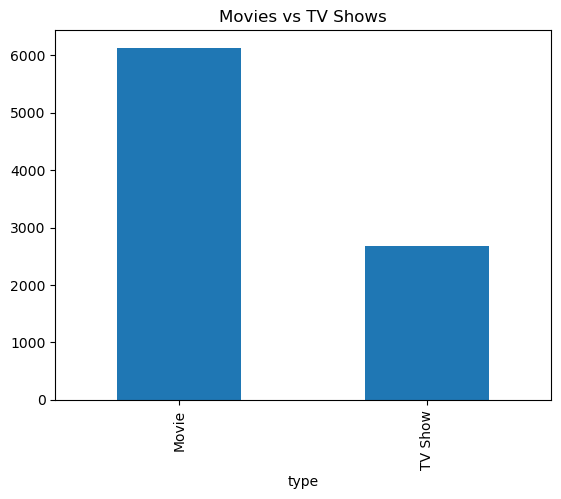

In [27]:
print("Total rows:", df.shape[0])

df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows')

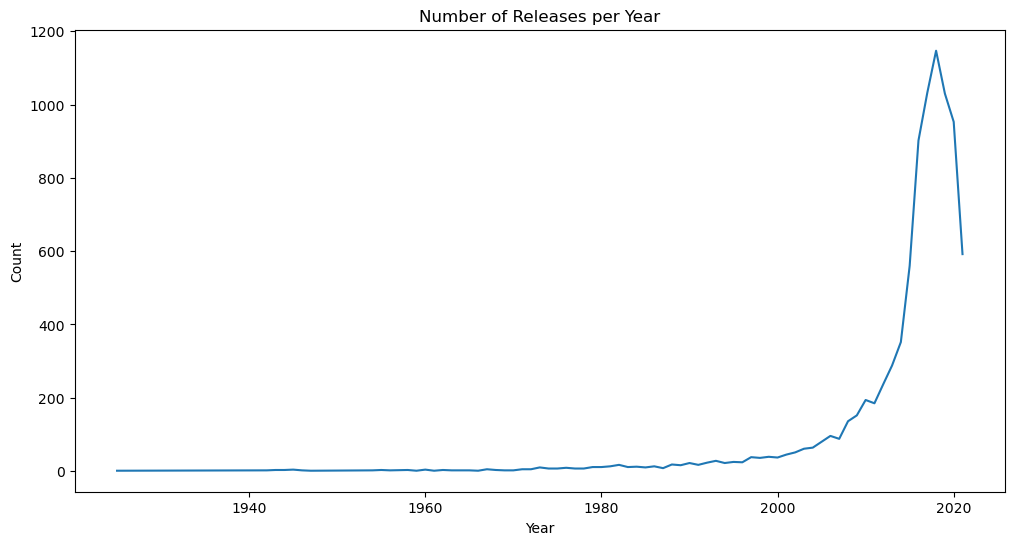

In [29]:
import matplotlib.pyplot as plt

df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

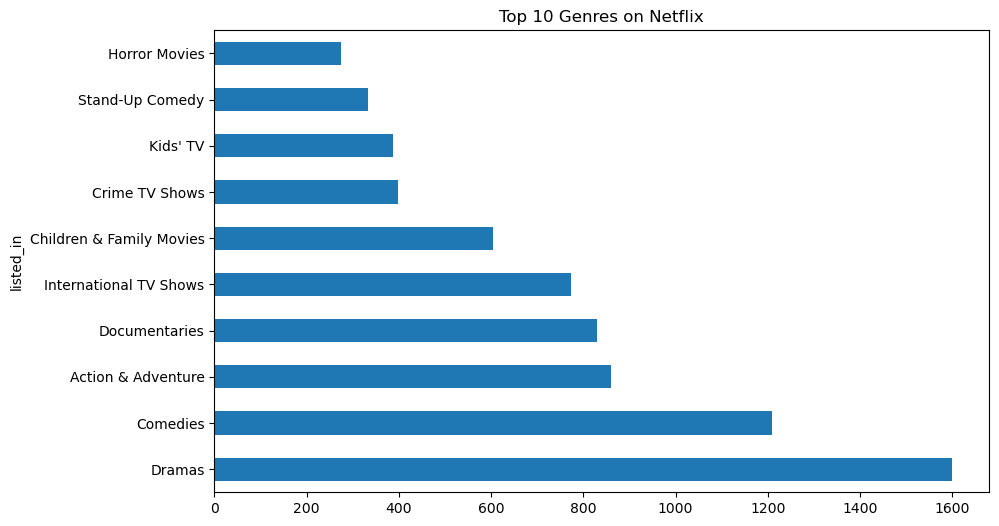

In [30]:
df['listed_in'].value_counts().head(10).plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Genres on Netflix")
plt.show()

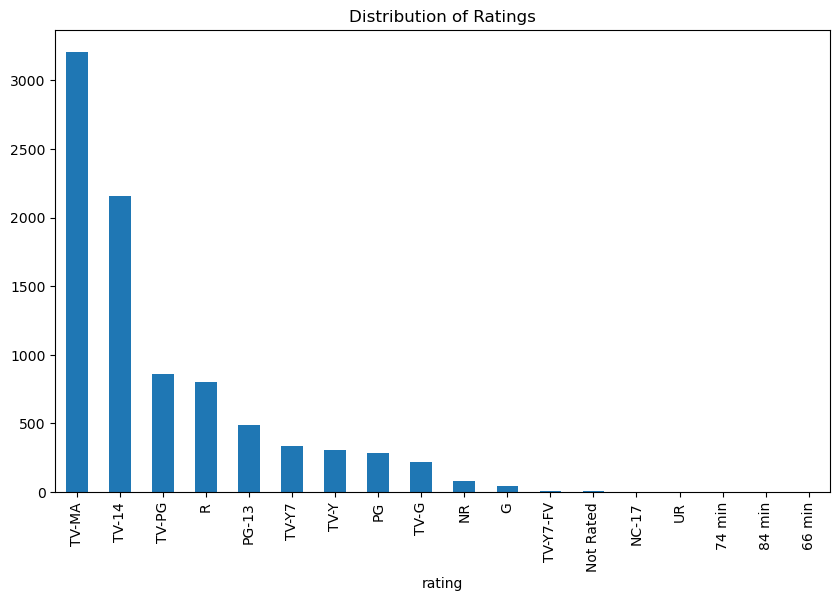

In [31]:
df['rating'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title("Distribution of Ratings")
plt.show()

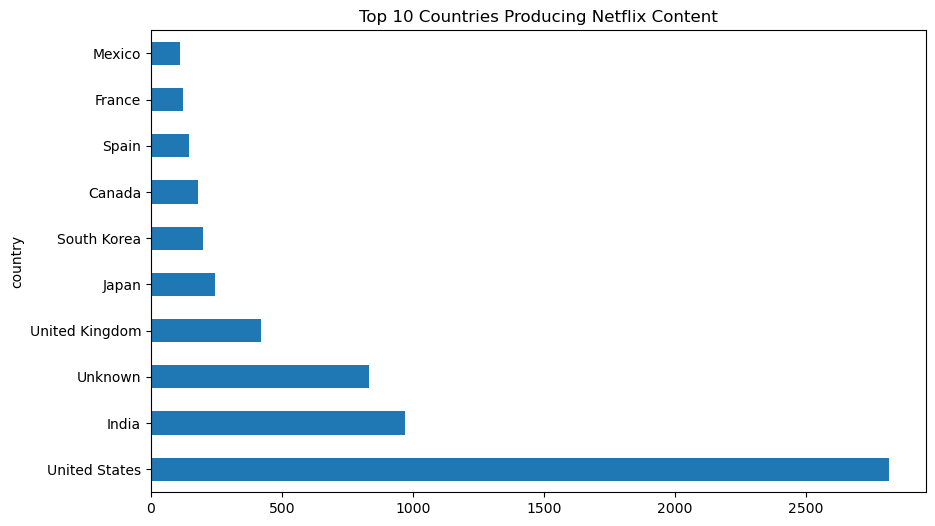

In [32]:
df['country'].value_counts().head(10).plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

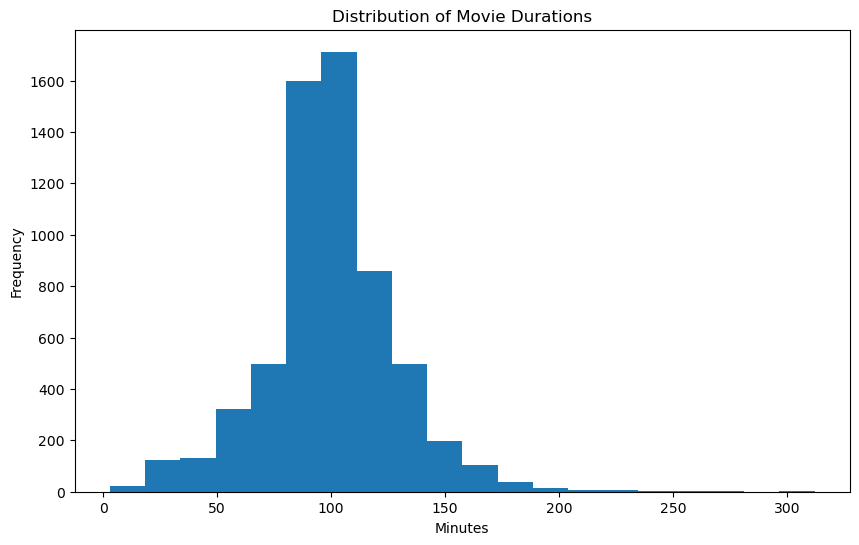

In [33]:
movies = df[df['type'] == 'Movie']
movies['duration'].plot(kind='hist', bins=20, figsize=(10,6))
plt.title("Distribution of Movie Durations")
plt.xlabel("Minutes")
plt.show()

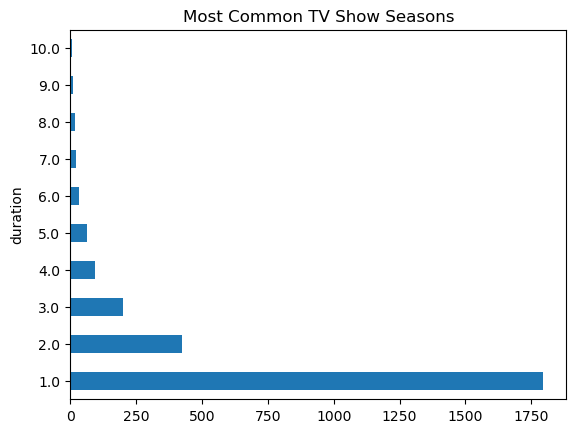

In [35]:
tv_shows = df[df['type'] == 'TV Show']
tv_shows['duration'].value_counts().head(10).plot(kind='barh')
plt.title("Most Common TV Show Seasons")
plt.show()

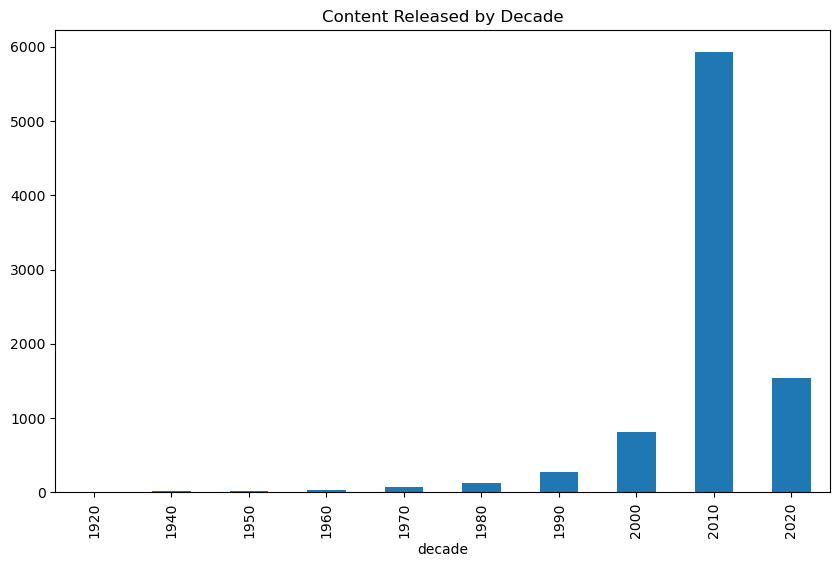

In [36]:
df['decade'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title("Content Released by Decade")
plt.show()

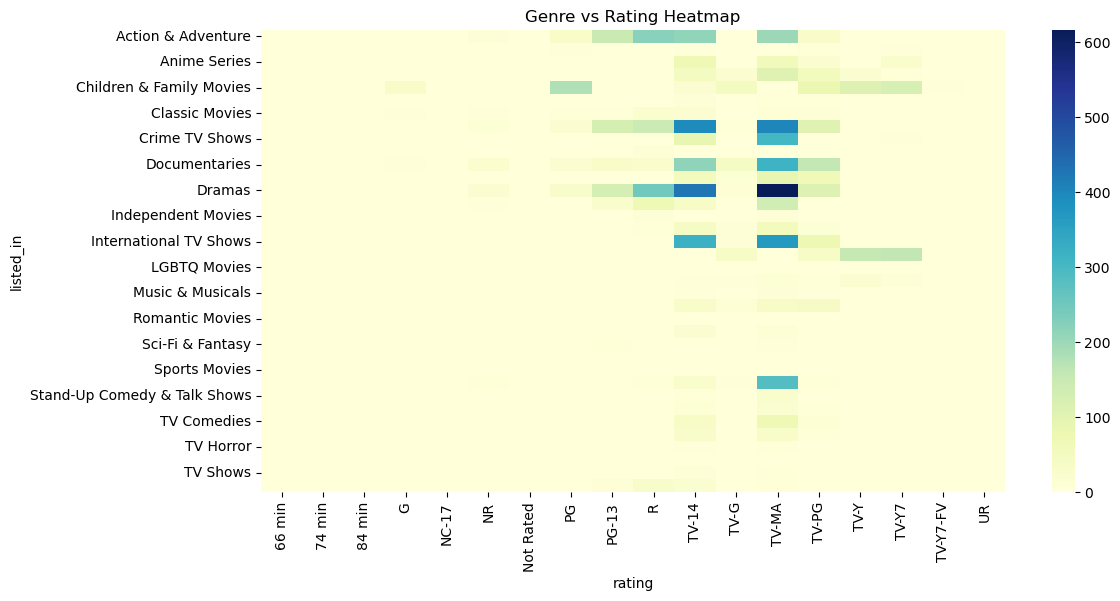

In [37]:
import seaborn as sns

genre_rating = pd.crosstab(df['listed_in'], df['rating'])
plt.figure(figsize=(12,6))
sns.heatmap(genre_rating, cmap="YlGnBu")
plt.title("Genre vs Rating Heatmap")
plt.show()